In [1]:
import pandas as pd
import re,sys,os


In [3]:
os.chdir('D:/hackathon/av_amex/')

In [10]:
sys.path.insert(0,'/train_AUpWtIz/')

In [11]:
os.listdir('./train_AUpWtIz/')

['campaign_data.csv',
 'coupon_item_mapping.csv',
 'customer_demographics.csv',
 'customer_transaction_data.csv',
 'item_data.csv',
 'train.csv',
 '__MACOSX']

In [22]:
customer_demographics=pd.read_csv('./train_AUpWtIz/customer_demographics.csv')
coupon_item_mapping=pd.read_csv('./train_AUpWtIz/coupon_item_mapping.csv')
customer_transaction_data=pd.read_csv('./train_AUpWtIz/customer_transaction_data.csv')
campaign_data=pd.read_csv('./train_AUpWtIz/campaign_data.csv')
item_data=pd.read_csv('./train_AUpWtIz/item_data.csv')
traindf=pd.read_csv('./train_AUpWtIz/train.csv')

In [65]:
testdf=pd.read_csv('test_QyjYwdj.csv')

In [67]:
testdf=testdf.merge(campaign_data,on='campaign_id',how='left')

In [68]:
testdf.head()

,id,campaign_id,coupon_id,customer_id,campaign_type,start_date,end_date
0,3,22,869,967,X,16/09/13,18/10/13
1,4,20,389,1566,Y,07/09/13,16/11/13
2,5,22,981,510,X,16/09/13,18/10/13
3,8,25,1069,361,Y,21/10/13,22/11/13
4,10,17,498,811,Y,29/07/13,30/08/13


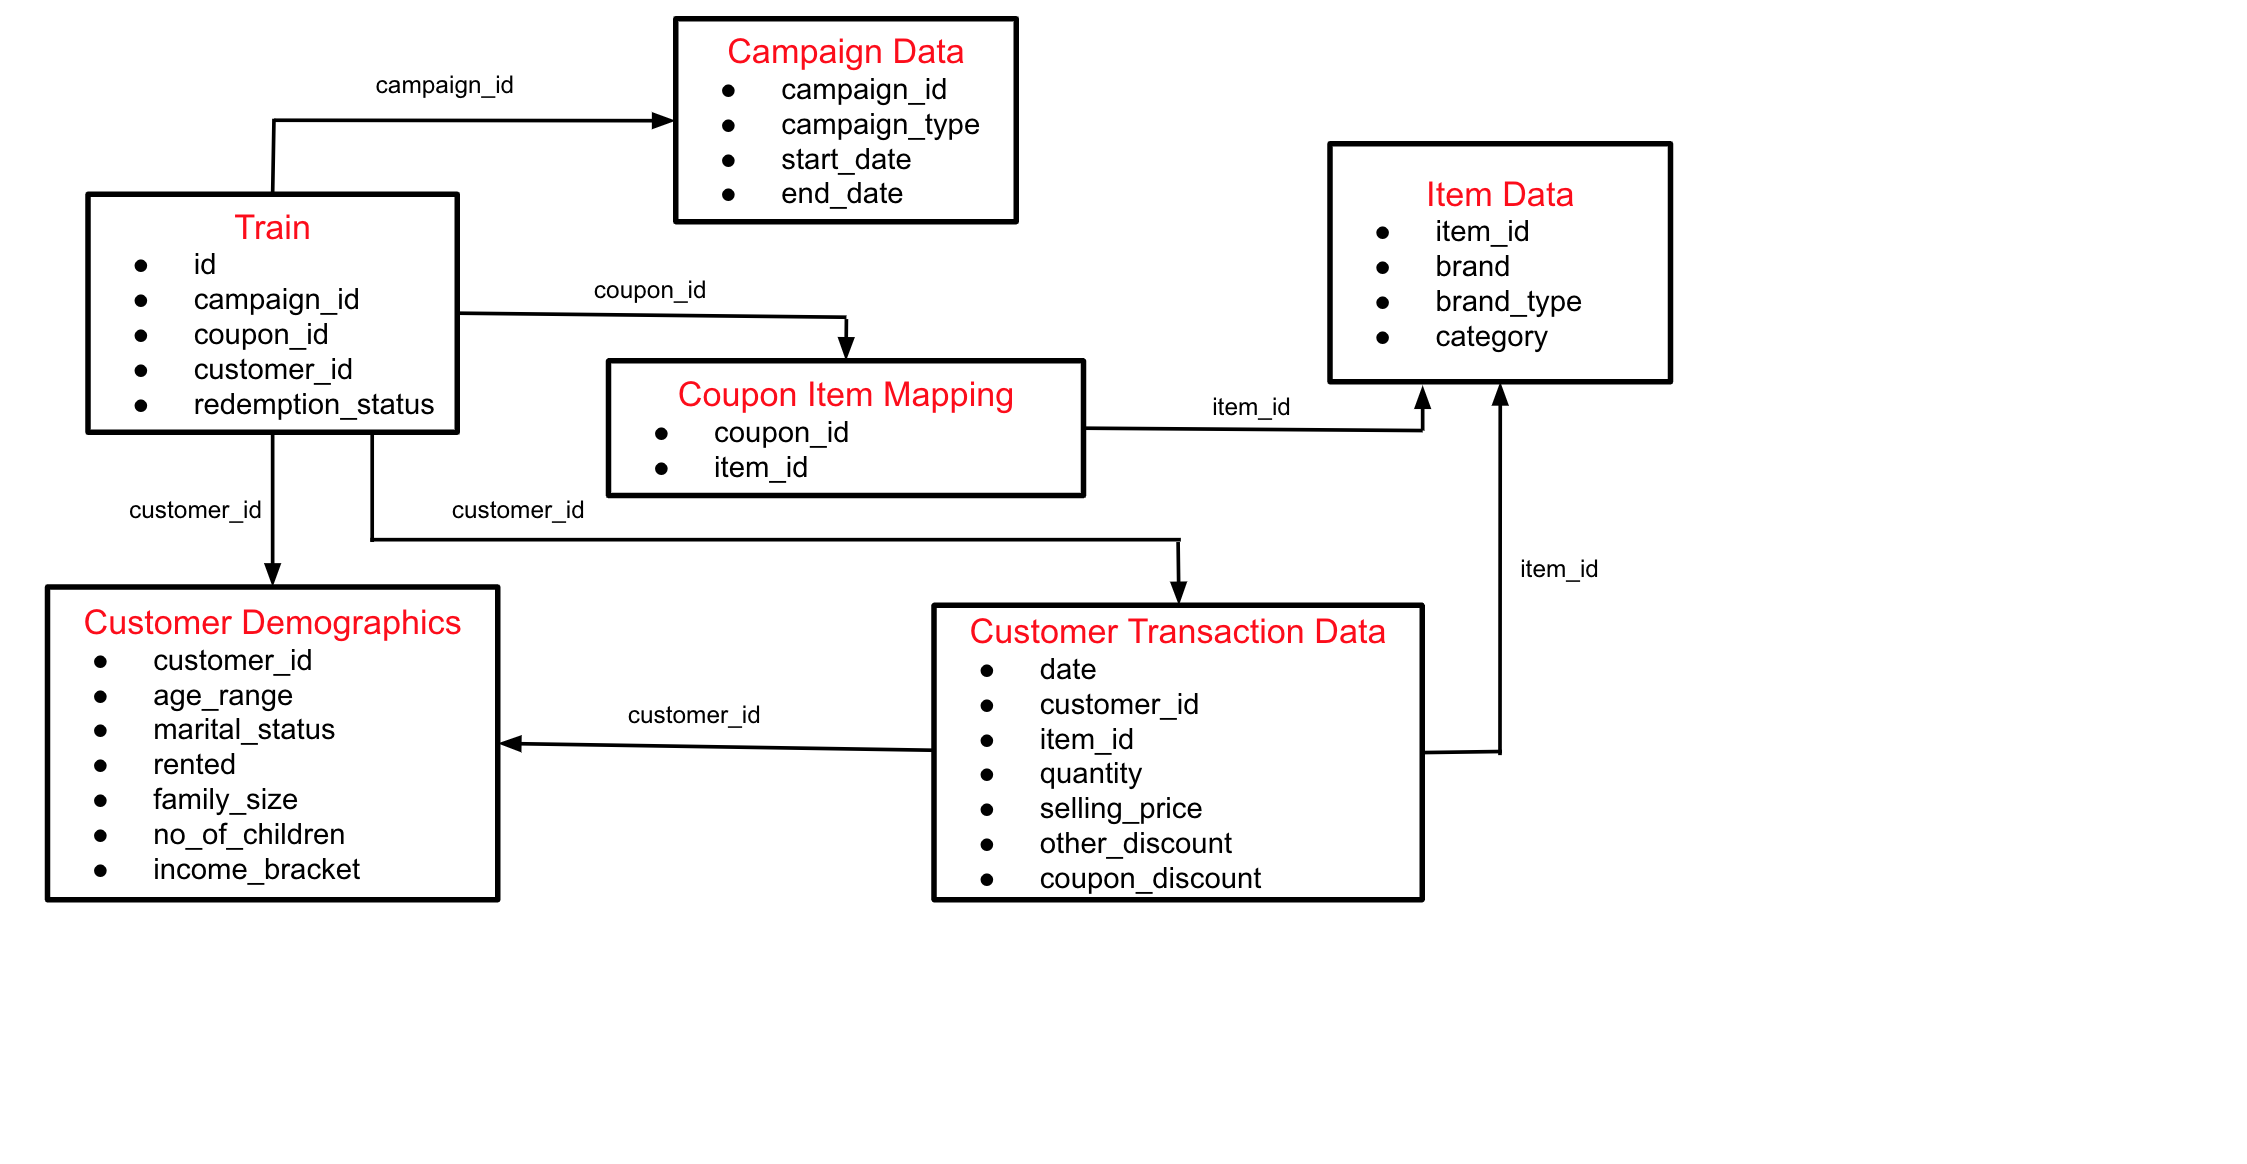

In [23]:
from IPython.display import Image
Image("mapping.png")



In [24]:
customer_transaction_data.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0


In [25]:
traindf.head()

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0
2,6,9,635,205,0
3,7,13,644,1050,0
4,9,8,1017,1489,0


In [26]:
traindf=traindf.merge(campaign_data,on='campaign_id',how='left')

In [27]:
traindf.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date
0,1,13,27,1053,0,X,19/05/13,05/07/13
1,2,13,116,48,0,X,19/05/13,05/07/13
2,6,9,635,205,0,Y,11/03/13,12/04/13
3,7,13,644,1050,0,X,19/05/13,05/07/13
4,9,8,1017,1489,0,X,16/02/13,05/04/13


In [59]:
traindf[(traindf['customer_id']==1) & (traindf['redemption_status']==1)  ].head(10)

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date
25380,41644,8,473,1,1,X,16/02/13,05/04/13
57575,94621,8,772,1,1,X,16/02/13,05/04/13


In [30]:
# adding purchased product description
customerAnalysis=customer_transaction_data.merge(item_data,on='item_id',how='left')

In [32]:
## Adding customer demographics
customerAnalysis=customerAnalysis.merge(customer_demographics,on='customer_id',how='left')

In [34]:
customerAnalysis.isnull().sum()

date                     0
customer_id              0
item_id                  0
quantity                 0
selling_price            0
other_discount           0
coupon_discount          0
brand                    0
brand_type               0
category                 0
age_range           532964
marital_status      863267
rented              532964
family_size         532964
no_of_children     1054199
income_bracket      532964
dtype: int64

In [36]:
customerAnalysis.shape

(1324566, 16)

In [37]:
customerAnalysis.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0,56,Local,Natural Products,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0,56,Local,Natural Products,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0,524,Established,Grocery,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-01-02,1501,33647,1,67.32,0.00,0.0,1134,Established,Grocery,NaN,NaN,NaN,NaN,NaN,NaN
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0,524,Established,Grocery,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
## adding coupon item details
customerAnalysis=customerAnalysis.merge(coupon_item_mapping,on='item_id',how='left')

In [39]:
customerAnalysis.isnull().sum()

date                     0
customer_id              0
item_id                  0
quantity                 0
selling_price            0
other_discount           0
coupon_discount          0
brand                    0
brand_type               0
category                 0
age_range          1063330
marital_status     1726055
rented             1063330
family_size        1063330
no_of_children     2114090
income_bracket     1063330
coupon_id           556134
dtype: int64

In [40]:
customerAnalysis.shape

(2657495, 17)

In [41]:
customerAnalysis.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category,age_range,marital_status,rented,family_size,no_of_children,income_bracket,coupon_id
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0,56,Local,Natural Products,NaN,NaN,NaN,NaN,NaN,NaN,7.0
1,2012-01-02,1501,26830,1,35.26,-10.69,0.0,56,Local,Natural Products,NaN,NaN,NaN,NaN,NaN,NaN,20.0
2,2012-01-02,1501,26830,1,35.26,-10.69,0.0,56,Local,Natural Products,NaN,NaN,NaN,NaN,NaN,NaN,29.0
3,2012-01-02,1501,54253,1,53.43,-13.89,0.0,56,Local,Natural Products,NaN,NaN,NaN,NaN,NaN,NaN,7.0
4,2012-01-02,1501,54253,1,53.43,-13.89,0.0,56,Local,Natural Products,NaN,NaN,NaN,NaN,NaN,NaN,20.0


In [42]:
coupon_item_mapping.shape,len(coupon_item_mapping['item_id'].unique())

((92663, 2), 36289)

In [43]:
coupon_item_mapping.head()

,coupon_id,item_id
0,105,37
1,107,75
2,494,76
3,522,77
4,518,77


In [64]:
customerAnalysis[(customerAnalysis['customer_id']==1) & (customerAnalysis['coupon_id']==772)].drop_duplicates()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category,age_range,marital_status,rented,family_size,no_of_children,income_bracket,coupon_id
180566,2012-04-04,1,58644,2,178.10,-70.53,0.00,914,Established,Grocery,70+,Married,0.0,2,NaN,4.0,772.0
258807,2012-04-21,1,58644,1,89.05,-35.26,0.00,914,Established,Grocery,70+,Married,0.0,2,NaN,4.0,772.0
339257,2012-05-08,1,58644,1,124.31,0.00,0.00,914,Established,Grocery,70+,Married,0.0,2,NaN,4.0,772.0
434845,2012-05-26,1,58644,1,106.50,-17.81,0.00,914,Established,Grocery,70+,Married,0.0,2,NaN,4.0,772.0
530454,2012-06-14,1,58644,1,106.50,-17.81,0.00,914,Established,Grocery,70+,Married,0.0,2,NaN,4.0,772.0
831033,2012-08-12,1,58644,1,89.05,-35.26,0.00,914,Established,Grocery,70+,Married,0.0,2,NaN,4.0,772.0
1062587,2012-09-20,1,58644,1,89.05,-35.26,0.00,914,Established,Grocery,70+,Married,0.0,2,NaN,4.0,772.0
1161833,2012-10-09,1,58644,1,89.05,-35.26,0.00,914,Established,Grocery,70+,Married,0.0,2,NaN,4.0,772.0
1408822,2012-11-20,1,58644,1,124.31,0.00,0.00,914,Established,Grocery,70+,Married,0.0,2,NaN,4.0,772.0
1481855,2012-12-03,1,58644,1,120.75,-3.56,0.00,914,Established,Grocery,70+,Married,0.0,2,NaN,4.0,772.0


In [63]:
traindf[(traindf['customer_id']==1) & (traindf['redemption_status']==1)  ].head(10)

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date
25380,41644,8,473,1,1,X,16/02/13,05/04/13
57575,94621,8,772,1,1,X,16/02/13,05/04/13


In [72]:
type(traindf['start_date'][0]),type(customerAnalysis['date'][0])

(str, str)

In [73]:
traindf['start_date'][0],customerAnalysis['date'][0]

('19/05/13', '2012-01-02')

In [74]:
import datetime

In [78]:
q=datetime.datetime.strptime(traindf['start_date'][0],'%d/%m/%y')

In [79]:
q1=datetime.datetime.strptime(customerAnalysis['date'][0],'%Y-%m-%d')

In [85]:
q.month,q1.month,q.date(),q1.date()

(5, 1, datetime.date(2013, 5, 19), datetime.date(2012, 1, 2))

In [87]:
(q.date()-q1.date()).days

503

In [92]:
q1 > q

False